In [1]:
import numpy as np
import json
import os
import string
import glob as g
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def load_log_jsons(log_dir):
    json_files={}
    for path in g.glob(log_dir+"*.json"):
        with open(path) as f:
            json_data=json.loads(f.read())
            json_files[json_data["function_name"]]=json_data
    return json_files

log_random=load_log_jsons("log_random/")
log_RS=load_log_jsons("log_RS/")
log_RLS=load_log_jsons("log_RLS/")

random
RLS


[[[1.0, 9542.0], [2.0, 9645.0], [4.0, 9674.0], [8.0, 9737.0], [18.0, 9760.0], [72.0, 9812.0], [100.0, 9622.0]], [[1.0, 9509.0], [2.0, 9709.0], [91.0, 9754.0], [100.0, 9531.0]], [[1.0, 9677.0], [4.0, 9730.0], [47.0, 9731.0], [88.0, 9760.0], [100.0, 9441.0]], [[1.0, 9585.0], [3.0, 9688.0], [21.0, 9693.0], [45.0, 9757.0], [100.0, 9740.0]], [[1.0, 9502.0], [2.0, 9614.0], [3.0, 9701.0], [29.0, 9812.0], [100.0, 9651.0]], [[1.0, 9695.0], [11.0, 9706.0], [18.0, 9722.0], [42.0, 9729.0], [71.0, 9757.0], [84.0, 9763.0], [100.0, 9706.0]], [[1.0, 9634.0], [5.0, 9641.0], [8.0, 9677.0], [9.0, 9704.0], [14.0, 9772.0], [100.0, 9576.0]], [[1.0, 9524.0], [2.0, 9534.0], [6.0, 9635.0], [11.0, 9680.0], [48.0, 9705.0], [53.0, 9721.0], [64.0, 9753.0], [100.0, 9645.0]], [[1.0, 9530.0], [2.0, 9645.0], [11.0, 9719.0], [25.0, 9720.0], [50.0, 9725.0], [73.0, 9728.0], [100.0, 9535.0]], [[1.0, 9528.0], [2.0, 9567.0], [6.0, 9634.0], [8.0, 9637.0], [9.0, 9729.0], [52.0, 9754.0], [100.0, 9576.0]]]


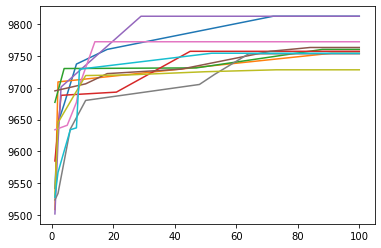

[[[1.0, 9649.0], [4.0, 9653.0], [5.0, 9657.0], [7.0, 9662.0], [8.0, 9670.0], [9.0, 9680.0], [11.0, 9690.0], [13.0, 9695.0], [15.0, 9702.0], [16.0, 9705.0], [17.0, 9706.0], [101.0, 9690.0]], [[1.0, 9518.0], [3.0, 9522.0], [5.0, 9526.0], [6.0, 9535.0], [18.0, 9539.0], [19.0, 9543.0], [20.0, 9548.0], [27.0, 9552.0], [28.0, 9554.0], [29.0, 9569.0], [33.0, 9573.0], [34.0, 9584.0], [47.0, 9586.0], [101.0, 9569.0]], [[1.0, 9583.0], [2.0, 9592.0], [4.0, 9599.0], [6.0, 9608.0], [24.0, 9609.0], [29.0, 9618.0], [30.0, 9620.0], [32.0, 9622.0], [33.0, 9627.0], [101.0, 9593.0]], [[1.0, 9666.0], [2.0, 9671.0], [4.0, 9678.0], [11.0, 9689.0], [12.0, 9694.0], [13.0, 9695.0], [46.0, 9699.0], [77.0, 9700.0], [78.0, 9702.0], [85.0, 9703.0], [87.0, 9711.0], [91.0, 9727.0], [101.0, 9672.0]], [[1.0, 9635.0], [3.0, 9636.0], [6.0, 9644.0], [12.0, 9647.0], [17.0, 9653.0], [19.0, 9659.0], [20.0, 9661.0], [22.0, 9665.0], [27.0, 9673.0], [28.0, 9674.0], [29.0, 9676.0], [31.0, 9686.0], [52.0, 9687.0], [53.0, 9691.0]

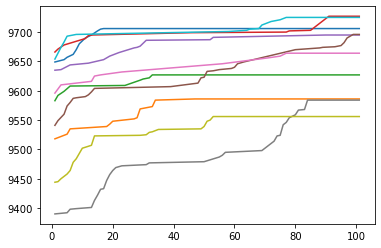

random
RLS


In [11]:

def plot_log(log,log_dir,function_name,scenario,runs_id=[],last_best=True):
    path=log[function_name]["scenarios"][scenario]["path"]
    all_id=(len(runs_id)==0)
    with open(log_dir+path) as f:
        lines=f.readlines()
    runs=[]
    run=-1
    for l in lines:
        if(l[0]=="e"):
            run+=1
            if((run in runs_id) or all_id):
                runs.append([])
        else:
            if((run in runs_id) or all_id):
                runs[-1].append([float(x) for x in l.split()])
    print(runs)
    runs=[np.array(run).transpose() for run in runs]
    plt.clf()
    for x,y in runs:
        if(last_best):
            y[-1]=max(y[-1],y[-2])
        plt.plot(x,y)
    plt.show()

plot_log(log_RS,"log_RS/","MaxCut2000",0,[])
plot_log(log_RLS,"log_RLS/","MaxCut2000",0,[])


[-11.904761904761903, 239.58333333333331, 381.44329896907215, 181.8181818181818, 1129.6296296296296, -76.92307692307692, 0.0, 562.5, -363.6363636363637, 45.791245791245785, 14.629049111807733, 754.4331004836109, 675.6393001345895, 281.49768635176616, 1437.1151599355837, -454.0012627574467, 881.1393813515318, 749.915157122755, 533.1949762306492, 76.90116975504095, 749.9626914031776, 632.8927852027799, 630.9349292321303, -174.3260480293101, 987.8472733003906, 615.2429378479994, 499.8608428938823, 941.1471456519756, 913.0053832308424, 474.84436906270054, -339.2741926599519, 599.3287013904066, 1615.1789619602903, 867.9245283018868, -324.3243243243243, -41.666666666666664, 74.07407407407408, 172.49863313285948, 546.8613138686131, 203.125, 9.494743981010513, -159.08071952390242, -195.1100116619097, 0.0, -256.3944859339138, -1169.7101911446614, 1089.2455008150532, -293.2984901231014, -428.8454181176862, -148.9237707969873, 647.0405921774578, 89.54376449995665, -1047.550005390396, -337.4637081

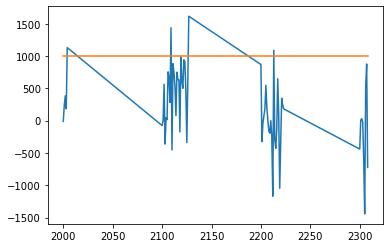

In [20]:
def plot_performances(log_random,others):
    scales={}
    for fun in log_random:
        pb_json=log_random[fun]
        id=pb_json["function_id"]
        y_min=float('inf')
        y_max=float('-inf')
        for run in pb_json["scenarios"][0]["runs"]:
            y=run["best"]["y"]
            y_min=min(y_min,y)
            y_max=max(y_max,y)
        scales[id]=(y_min,y_max)

    for log in others:
        id_list=[]
        y_list=[]
        for fun in log:
            pb_json=log[fun]
            id=pb_json["function_id"]
            # if(id>2200):
                # continue
            id_list.append(id)
            y=float('-inf')
            for r in pb_json["scenarios"][0]["runs"]:
                y=max(r["best"]["y"],y)
            y_min=scales[id][0]
            y_max=scales[id][1]
            y_list.append((y-y_min)/(max(1,y_max-y_min)/1000))
            # y_list.append(y)
        print(y_list)
        plt.plot(id_list,y_list)
plot_performances(log_random,[log_RLS,log_RS])